In [1]:
from sklearn import linear_model
from exchange.board import *
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

history = load_file('../DATA/BF-TEST.log')
df = history.dollar_bar(tick_vol=50)

In [2]:
close_price  = df[['close']]
close_price.reset_index(inplace=True)

x = close_price['time'].values
X = close_price['time']

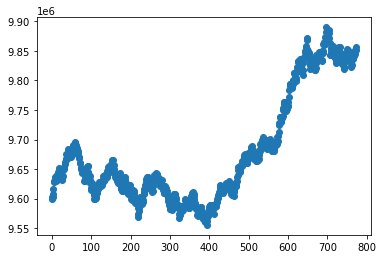

In [3]:
plt.scatter(X, df['close'])
plt.show()



In [4]:
y = close_price['close'].values
Y = close_price['close'].values.reshape(-1, 1)


def linear_score(x, y, length=100, position=1):
    if len(x) < length + position:
        return None

    x = x[-length-position:-position]
    y = y[-length-position:-position]

    clf = linear_model.LinearRegression()
    clf.fit(x, y)

    return clf.coef_[0][0], clf.intercept_[0], clf.score(x, y)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def linear_score(x_pos, y_target, length=100, position=1):
    if len(x_pos) < length + position:
        return None

    x_pos = x_pos[-length-position:-position].reshape(-1, 1)
    y_target = y_target[-length-position:-position].reshape(-1, 1)

    #x_pos = x_pos[-length-position:-position]
    #y_target = y_target[-length-position:-position]

    lr = LinearRegression()
    lr.fit(x_pos, y_target)

    y_predict = lr.predict(x_pos)

    error = mean_squared_error(y_target, y_predict) / length

    return lr.coef_[0][0], lr.intercept_[0], error



In [30]:

z = lowess(y, x, return_sorted=False, frac=1/5)


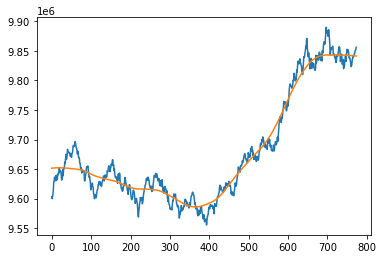

In [31]:
plt.plot(x, y)
plt.plot(x, z)
plt.show()

In [8]:
type(z)

numpy.ndarray

In [9]:
score = linear_score(x, z, 100)

score

(5.5951989099551005, 9838378.94213842, 7406.38117638696)

In [10]:
score = linear_score(x, z, 400, 100)

score

(658.9542155594052, 9358069.115193246, 2301033.581412565)

In [11]:
score = linear_score(x, z)

score

(5.5951989099551005, 9838378.94213842, 7406.38117638696)

In [12]:
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [32]:
from scipy import signal
maxId = signal.argrelmax(y, order=30)
minId = signal.argrelmin(y, order=30)

maxId
minId


(array([  1, 220, 324, 393, 462, 561, 669, 741]),)

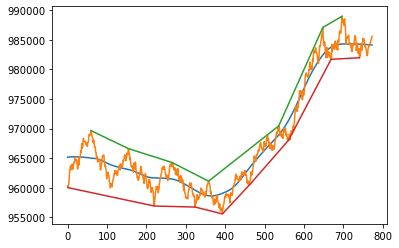

In [34]:
plt.plot(x, z/10)
plt.plot(x, y/10)
plt.plot(x[maxId], y[maxId]/10)
plt.plot(x[minId], y[minId]/10)
plt.show()

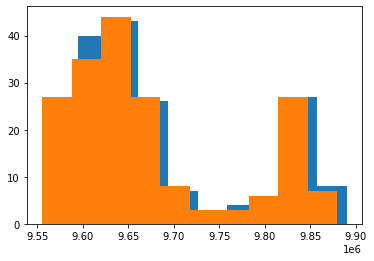

In [29]:
from scipy import signal
maxId = signal.argrelmax(y, order=1)
minId = signal.argrelmin(y, order=1)
maxId

plt.hist(y[maxId])
plt.hist(y[minId])
plt.show()